In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import numpy as np
import matplotlib.pyplot as plt

from ml_tools.ui import UI

ui = UI()
ui.connect("./public")

'127.0.0.1:54236'

2022/04/19 21:03:15 Video stream handler: w.services.Video.GetStreamUpdateChan Error: Stream with name: raw does not exist
2022/04/19 21:03:15 Video stream handler: w.services.Video.GetStreamUpdateChan Error: Stream with name: preprocessed does not exist


In [2]:
model_name = "01_model_game-trained"

# brain_name = "baseline"
# brain_name = "pre-trained/baseline"
# brain_name = "pre-trained/all-trainable"

brain_name = "fast-epsilon-decay/pre-trained/baseline"

load_pre_trained = True

In [3]:
from brain.v2.brain import Brain
from preprocessor.v1.preprocessor import Preprocessor

preprocessor = Preprocessor()
preprocessor.ui = ui
brain = Brain(learning_rate=0.0001)
brain.ui = ui

if load_pre_trained:
  pre_trained_name = "pre-trained"
  pre_trained_model_name = "00_model_pre-trained"
  
  brain.load_layers_and_compile_model(
    name=pre_trained_name, model_name=pre_trained_model_name, 
    num_layers=6, trainable=False
  )
  print("")
else:
  brain.build_and_compile_model()

brain.model.summary()

Loaded layer:
input_1
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 11, 11, 32)        6176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                  

In [4]:
agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain, preprocessor=preprocessor,

  epsilon_start = 1,
  epsilon_stop = 0.001,
  epsilon_decay_num_steps = 250,
  
  discount_factor=0.97,
  
  replay_batch_size=32*2,
  model_batch_size=16,

  steps_to_train=20,
  steps_to_update_target=40,

  replay_memory_max_len=50_000,
  replay_memory_min_len= 2_000,
)

env = gym.make("snake-v0")

score = 0
scores = []
epsilons = []

game_num = 0

In [5]:
raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  if game_num == 5_000:
    break
    
  ui.video.update_stream("raw", raw_observation)

  speed = int(ui.control.get_value("speed") or 100)
  if speed != 100:
    time.sleep(1 / speed)

  agent.training = True if (ui.control.get_value("training") or "true") == "true" else False
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    epsilons.append(agent.epsilon)
    score = 0

    game_num += 1

    raw_observation = env.reset()
    agent.reset(raw_observation)

2022-04-19 21:03:26.282456: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 2ms/step - loss: 0.0105


4/4 [==============================] - 0s 3ms/step - loss: 0.0057


4/4 [==============================] - 0s 2ms/step - loss: 0.0019


4/4 [==============================] - 0s 2ms/step - loss: 0.0067


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 2ms/step - loss: 0.0017


4/4 [==============================] - 0s 2ms/step - loss: 0.0072


4/4 [==============================] - 0s 2ms/step - loss: 9.8526e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0087


4/4 [==============================] - 0s 2ms/step - loss: 0.0066


4/4 [==============================] - 0s 2ms/step - loss: 0.0027


4/4 [==============================] - 0s 2ms/step - loss: 0.0089


4/4 [==============================] - 0s 2ms/step - loss: 0.0044


4/4 [==============================] - 0s 3ms/step - loss: 0.0044


4/4 [==============================] - 0s 2ms/step - loss: 7.5473e-04


4/4 [==============================] - 0s 3ms/step - loss: 7.3341e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.1123e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0012


4/4 [==============================] - 0s 2ms/step - loss: 5.8069e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.6983e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.6392e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.6559e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.9233e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.6428e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.7831e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.4227e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.0008e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.1391e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.2346e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.8223e-04


4/4 [==============================] - 0s 2ms/step - loss: 7.5610e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.5429e-04


4/4 [==============================] - 0s 9ms/step - loss: 1.1014e-04


4/4 [==============================] - 0s 4ms/step - loss: 1.8432e-04


4/4 [==============================] - 0s 5ms/step - loss: 1.4029e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.5858e-04


4/4 [==============================] - 0s 3ms/step - loss: 4.7469e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.5368e-05


4/4 [==============================] - 0s 2ms/step - loss: 9.0776e-05


4/4 [==============================] - 0s 2ms/step - loss: 6.9437e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.2384e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.9328e-05


4/4 [==============================] - 0s 2ms/step - loss: 6.9912e-05


4/4 [==============================] - 0s 2ms/step - loss: 6.8142e-05


4/4 [==============================] - 0s 2ms/step - loss: 9.0549e-05


4/4 [==============================] - 0s 2ms/step - loss: 4.0872e-05


4/4 [==============================] - 0s 2ms/step - loss: 5.2884e-05


4/4 [==============================] - 0s 2ms/step - loss: 6.3033e-05


4/4 [==============================] - 0s 2ms/step - loss: 5.0864e-05


4/4 [==============================] - 0s 2ms/step - loss: 8.1960e-05


4/4 [==============================] - 0s 1ms/step - loss: 5.3537e-05


4/4 [==============================] - 0s 1ms/step - loss: 5.9581e-05


4/4 [==============================] - 0s 1ms/step - loss: 5.4722e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.1328e-04


4/4 [==============================] - 0s 2ms/step - loss: 9.6437e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.3233e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.3444e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.1367e-04


4/4 [==============================] - 0s 2ms/step - loss: 7.6023e-05


4/4 [==============================] - 0s 2ms/step - loss: 4.2307e-05


4/4 [==============================] - 0s 2ms/step - loss: 7.9360e-05


4/4 [==============================] - 0s 1ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 1.3325e-04


4/4 [==============================] - 0s 1ms/step - loss: 6.4063e-05


4/4 [==============================] - 0s 2ms/step - loss: 9.8887e-05


4/4 [==============================] - 0s 1ms/step - loss: 8.7904e-05


4/4 [==============================] - 0s 1ms/step - loss: 5.6023e-05


4/4 [==============================] - 0s 2ms/step - loss: 7.6838e-05


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 1ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 0.0038


4/4 [==============================] - 0s 2ms/step - loss: 8.4502e-05


4/4 [==============================] - 0s 1ms/step - loss: 1.4728e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.2595e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.2577e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.5314e-04


4/4 [==============================] - 0s 1ms/step - loss: 5.5237e-05


4/4 [==============================] - 0s 2ms/step - loss: 7.8491e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.1305e-04


4/4 [==============================] - 0s 2ms/step - loss: 8.1662e-05


4/4 [==============================] - 0s 1ms/step - loss: 1.1004e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.9335e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.0914e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.2094e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.0852e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.1693e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.3382e-05


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 6.3827e-05


4/4 [==============================] - 0s 2ms/step - loss: 4.9198e-05


4/4 [==============================] - 0s 1ms/step - loss: 7.7105e-05


4/4 [==============================] - 0s 2ms/step - loss: 7.0312e-05


4/4 [==============================] - 0s 2ms/step - loss: 6.7335e-05


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 7.8729e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.6360e-04


4/4 [==============================] - 0s 2ms/step - loss: 8.5147e-05


4/4 [==============================] - 0s 2ms/step - loss: 7.3816e-05


4/4 [==============================] - 0s 1ms/step - loss: 1.0765e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.1564e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.7833e-05


4/4 [==============================] - 0s 2ms/step - loss: 7.1406e-05


4/4 [==============================] - 0s 2ms/step - loss: 5.1734e-05


4/4 [==============================] - 0s 1ms/step - loss: 2.0177e-04


4/4 [==============================] - 0s 2ms/step - loss: 6.4531e-05


4/4 [==============================] - 0s 2ms/step - loss: 5.5225e-05


4/4 [==============================] - 0s 2ms/step - loss: 5.1262e-05


4/4 [==============================] - 0s 2ms/step - loss: 2.0265e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.1762e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.0600e-04


4/4 [==============================] - 0s 2ms/step - loss: 8.2924e-05


4/4 [==============================] - 0s 2ms/step - loss: 9.1608e-05


4/4 [==============================] - 0s 2ms/step - loss: 1.1212e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 1.4160e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 2.3661e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.5772e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 2.5290e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.8931e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.6485e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.5745e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.4438e-04


4/4 [==============================] - 0s 2ms/step - loss: 8.1441e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.3360e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0044


4/4 [==============================] - 0s 2ms/step - loss: 3.6038e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 5.0432e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 2.2193e-04


4/4 [==============================] - 0s 1ms/step - loss: 3.9654e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.4298e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 2.6086e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 0.0019


4/4 [==============================] - 0s 2ms/step - loss: 2.2645e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.5640e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 3.2999e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.3655e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.3855e-04


4/4 [==============================] - 0s 1ms/step - loss: 5.4598e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.0894e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.2129e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.9917e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.2677e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 1.6284e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.9336e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.9544e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.9799e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 2.0682e-04


4/4 [==============================] - 0s 2ms/step - loss: 6.5101e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0018


4/4 [==============================] - 0s 2ms/step - loss: 2.3506e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.5293e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0055


4/4 [==============================] - 0s 2ms/step - loss: 1.8256e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.5626e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 2.6478e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.1323e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.3939e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.0633e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0029


4/4 [==============================] - 0s 1ms/step - loss: 2.1712e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 1ms/step - loss: 1.7870e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.6098e-04


4/4 [==============================] - 0s 1ms/step - loss: 3.4257e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.2507e-04


4/4 [==============================] - 0s 1ms/step - loss: 3.3173e-04


4/4 [==============================] - 0s 1ms/step - loss: 1.2950e-04


4/4 [==============================] - 0s 1ms/step - loss: 6.7811e-05


4/4 [==============================] - 0s 1ms/step - loss: 7.5305e-05


4/4 [==============================] - 0s 1ms/step - loss: 8.9697e-05


4/4 [==============================] - 0s 1ms/step - loss: 8.7146e-05


4/4 [==============================] - 0s 1ms/step - loss: 0.0018


4/4 [==============================] - 0s 1ms/step - loss: 1.8445e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0021


4/4 [==============================] - 0s 1ms/step - loss: 3.9332e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.4828e-04


4/4 [==============================] - 0s 1ms/step - loss: 2.6761e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0014


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 6.6333e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0039


4/4 [==============================] - 0s 1ms/step - loss: 7.1589e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0043


4/4 [==============================] - 0s 1ms/step - loss: 0.0028


4/4 [==============================] - 0s 2ms/step - loss: 8.5734e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0027


4/4 [==============================] - 0s 2ms/step - loss: 0.0049


4/4 [==============================] - 0s 1ms/step - loss: 0.0011


4/4 [==============================] - 0s 1ms/step - loss: 0.0042


4/4 [==============================] - 0s 1ms/step - loss: 0.0087


4/4 [==============================] - 0s 1ms/step - loss: 0.0014


4/4 [==============================] - 0s 1ms/step - loss: 0.0018


4/4 [==============================] - 0s 1ms/step - loss: 0.0020


4/4 [==============================] - 0s 1ms/step - loss: 0.0058


4/4 [==============================] - 0s 1ms/step - loss: 0.0056


4/4 [==============================] - 0s 1ms/step - loss: 0.0013


4/4 [==============================] - 0s 1ms/step - loss: 0.0060


4/4 [==============================] - 0s 1ms/step - loss: 0.0035


4/4 [==============================] - 0s 1ms/step - loss: 0.0107


4/4 [==============================] - 0s 1ms/step - loss: 0.0151


4/4 [==============================] - 0s 1ms/step - loss: 0.0047


4/4 [==============================] - 0s 1ms/step - loss: 0.0129


4/4 [==============================] - 0s 2ms/step - loss: 0.0119


4/4 [==============================] - 0s 1ms/step - loss: 0.0025


4/4 [==============================] - 0s 1ms/step - loss: 0.0048


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0022


4/4 [==============================] - 0s 1ms/step - loss: 0.0062


4/4 [==============================] - 0s 1ms/step - loss: 0.0021


4/4 [==============================] - 0s 1ms/step - loss: 0.0124


4/4 [==============================] - 0s 1ms/step - loss: 0.0027


4/4 [==============================] - 0s 1ms/step - loss: 0.0040


4/4 [==============================] - 0s 1ms/step - loss: 0.0037


4/4 [==============================] - 0s 1ms/step - loss: 0.0081


4/4 [==============================] - 0s 1ms/step - loss: 0.0017


4/4 [==============================] - 0s 1ms/step - loss: 0.0028


4/4 [==============================] - 0s 1ms/step - loss: 0.0021


4/4 [==============================] - 0s 1ms/step - loss: 0.0056


4/4 [==============================] - 0s 1ms/step - loss: 0.0108


4/4 [==============================] - 0s 1ms/step - loss: 0.0056


4/4 [==============================] - 0s 1ms/step - loss: 0.0098


4/4 [==============================] - 0s 1ms/step - loss: 0.0055


4/4 [==============================] - 0s 1ms/step - loss: 0.0096


4/4 [==============================] - 0s 1ms/step - loss: 0.0037


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 1ms/step - loss: 0.0034


4/4 [==============================] - 0s 1ms/step - loss: 0.0045


4/4 [==============================] - 0s 1ms/step - loss: 0.0084


4/4 [==============================] - 0s 1ms/step - loss: 0.0034


4/4 [==============================] - 0s 1ms/step - loss: 0.0091


4/4 [==============================] - 0s 1ms/step - loss: 0.0041


4/4 [==============================] - 0s 1ms/step - loss: 0.0078


4/4 [==============================] - 0s 1ms/step - loss: 0.0133


4/4 [==============================] - 0s 1ms/step - loss: 0.0054


4/4 [==============================] - 0s 1ms/step - loss: 0.0088


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 0.0043


4/4 [==============================] - 0s 1ms/step - loss: 0.0085


4/4 [==============================] - 0s 1ms/step - loss: 0.0033


4/4 [==============================] - 0s 1ms/step - loss: 0.0067


4/4 [==============================] - 0s 1ms/step - loss: 0.0081


4/4 [==============================] - 0s 1ms/step - loss: 0.0021


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0024


4/4 [==============================] - 0s 2ms/step - loss: 0.0069


4/4 [==============================] - 0s 1ms/step - loss: 0.0137


4/4 [==============================] - 0s 1ms/step - loss: 0.0093


4/4 [==============================] - 0s 1ms/step - loss: 0.0053


4/4 [==============================] - 0s 1ms/step - loss: 0.0036


4/4 [==============================] - 0s 1ms/step - loss: 0.0069


4/4 [==============================] - 0s 1ms/step - loss: 0.0157


4/4 [==============================] - 0s 1ms/step - loss: 0.0050


4/4 [==============================] - 0s 1ms/step - loss: 0.0075


4/4 [==============================] - 0s 1ms/step - loss: 0.0058


4/4 [==============================] - 0s 1ms/step - loss: 0.0133


4/4 [==============================] - 0s 1ms/step - loss: 0.0059


4/4 [==============================] - 0s 1ms/step - loss: 0.0044


4/4 [==============================] - 0s 1ms/step - loss: 0.0050


4/4 [==============================] - 0s 1ms/step - loss: 0.0058


4/4 [==============================] - 0s 1ms/step - loss: 0.0053


4/4 [==============================] - 0s 1ms/step - loss: 0.0074


4/4 [==============================] - 0s 1ms/step - loss: 0.0067


4/4 [==============================] - 0s 1ms/step - loss: 0.0097


4/4 [==============================] - 0s 1ms/step - loss: 0.0143


4/4 [==============================] - 0s 1ms/step - loss: 0.0071


4/4 [==============================] - 0s 1ms/step - loss: 0.0121


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0081


4/4 [==============================] - 0s 1ms/step - loss: 0.0060


4/4 [==============================] - 0s 1ms/step - loss: 0.0124


4/4 [==============================] - 0s 1ms/step - loss: 0.0130


4/4 [==============================] - 0s 1ms/step - loss: 0.0034


4/4 [==============================] - 0s 1ms/step - loss: 0.0137


4/4 [==============================] - 0s 1ms/step - loss: 0.0048


4/4 [==============================] - 0s 1ms/step - loss: 0.0050


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 1ms/step - loss: 0.0088


4/4 [==============================] - 0s 1ms/step - loss: 0.0052


4/4 [==============================] - 0s 1ms/step - loss: 0.0168


4/4 [==============================] - 0s 1ms/step - loss: 0.0032


4/4 [==============================] - 0s 1ms/step - loss: 0.0133


4/4 [==============================] - 0s 2ms/step - loss: 0.0045


4/4 [==============================] - 0s 1ms/step - loss: 0.0074


4/4 [==============================] - 0s 1ms/step - loss: 0.0132


4/4 [==============================] - 0s 1ms/step - loss: 0.0067


4/4 [==============================] - 0s 1ms/step - loss: 0.0091


4/4 [==============================] - 0s 1ms/step - loss: 0.0036


4/4 [==============================] - 0s 1ms/step - loss: 0.0139


4/4 [==============================] - 0s 1ms/step - loss: 0.0074


4/4 [==============================] - 0s 1ms/step - loss: 0.0106


4/4 [==============================] - 0s 1ms/step - loss: 0.0109


4/4 [==============================] - 0s 1ms/step - loss: 0.0091


4/4 [==============================] - 0s 1ms/step - loss: 0.0098


4/4 [==============================] - 0s 1ms/step - loss: 0.0101


4/4 [==============================] - 0s 1ms/step - loss: 0.0084


4/4 [==============================] - 0s 1ms/step - loss: 0.0051


4/4 [==============================] - 0s 1ms/step - loss: 0.0117


4/4 [==============================] - 0s 1ms/step - loss: 0.0064


4/4 [==============================] - 0s 1ms/step - loss: 0.0120


4/4 [==============================] - 0s 1ms/step - loss: 0.0096


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 1ms/step - loss: 0.0103


4/4 [==============================] - 0s 1ms/step - loss: 0.0101


4/4 [==============================] - 0s 1ms/step - loss: 0.0153


4/4 [==============================] - 0s 1ms/step - loss: 0.0074


4/4 [==============================] - 0s 1ms/step - loss: 0.0090


4/4 [==============================] - 0s 1ms/step - loss: 0.0078


4/4 [==============================] - 0s 1ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0086


4/4 [==============================] - 0s 1ms/step - loss: 0.0154


4/4 [==============================] - 0s 1ms/step - loss: 0.0061


4/4 [==============================] - 0s 1ms/step - loss: 0.0150


4/4 [==============================] - 0s 1ms/step - loss: 0.0052


4/4 [==============================] - 0s 1ms/step - loss: 0.0067


4/4 [==============================] - 0s 1ms/step - loss: 0.0029


4/4 [==============================] - 0s 1ms/step - loss: 0.0040


4/4 [==============================] - 0s 1ms/step - loss: 0.0058


4/4 [==============================] - 0s 1ms/step - loss: 0.0104


4/4 [==============================] - 0s 1ms/step - loss: 0.0057


4/4 [==============================] - 0s 1ms/step - loss: 0.0173


4/4 [==============================] - 0s 1ms/step - loss: 0.0124


4/4 [==============================] - 0s 1ms/step - loss: 0.0100


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0106


4/4 [==============================] - 0s 1ms/step - loss: 0.0053


4/4 [==============================] - 0s 1ms/step - loss: 0.0090


4/4 [==============================] - 0s 1ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0049


4/4 [==============================] - 0s 1ms/step - loss: 0.0066


4/4 [==============================] - 0s 1ms/step - loss: 0.0226


4/4 [==============================] - 0s 1ms/step - loss: 0.0102


4/4 [==============================] - 0s 1ms/step - loss: 0.0057


4/4 [==============================] - 0s 1ms/step - loss: 0.0087


4/4 [==============================] - 0s 1ms/step - loss: 0.0165


4/4 [==============================] - 0s 1ms/step - loss: 0.0110


4/4 [==============================] - 0s 1ms/step - loss: 0.0054


4/4 [==============================] - 0s 1ms/step - loss: 0.0100


4/4 [==============================] - 0s 1ms/step - loss: 0.0091


4/4 [==============================] - 0s 1ms/step - loss: 0.0123


4/4 [==============================] - 0s 1ms/step - loss: 0.0073


4/4 [==============================] - 0s 1ms/step - loss: 0.0089


4/4 [==============================] - 0s 1ms/step - loss: 0.0172


4/4 [==============================] - 0s 1ms/step - loss: 0.0045


4/4 [==============================] - 0s 1ms/step - loss: 0.0121


4/4 [==============================] - 0s 1ms/step - loss: 0.0071


4/4 [==============================] - 0s 1ms/step - loss: 0.0160


4/4 [==============================] - 0s 1ms/step - loss: 0.0066


4/4 [==============================] - 0s 1ms/step - loss: 0.0104


4/4 [==============================] - 0s 1ms/step - loss: 0.0098


4/4 [==============================] - 0s 1ms/step - loss: 0.0246


4/4 [==============================] - 0s 1ms/step - loss: 0.0085


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 1ms/step - loss: 0.0097


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0080


4/4 [==============================] - 0s 1ms/step - loss: 0.0158


4/4 [==============================] - 0s 1ms/step - loss: 0.0213


4/4 [==============================] - 0s 1ms/step - loss: 0.0128


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0054


4/4 [==============================] - 0s 1ms/step - loss: 0.0080


4/4 [==============================] - 0s 1ms/step - loss: 0.0111


4/4 [==============================] - 0s 1ms/step - loss: 0.0080


4/4 [==============================] - 0s 1ms/step - loss: 0.0119


4/4 [==============================] - 0s 1ms/step - loss: 0.0209


4/4 [==============================] - 0s 1ms/step - loss: 0.0171


4/4 [==============================] - 0s 1ms/step - loss: 0.0079


4/4 [==============================] - 0s 1ms/step - loss: 0.0061


4/4 [==============================] - 0s 1ms/step - loss: 0.0058


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 1ms/step - loss: 0.0107


4/4 [==============================] - 0s 1ms/step - loss: 0.0142


4/4 [==============================] - 0s 1ms/step - loss: 0.0064


4/4 [==============================] - 0s 1ms/step - loss: 0.0069


4/4 [==============================] - 0s 1ms/step - loss: 0.0123


4/4 [==============================] - 0s 1ms/step - loss: 0.0101


4/4 [==============================] - 0s 1ms/step - loss: 0.0067


4/4 [==============================] - 0s 1ms/step - loss: 0.0115


4/4 [==============================] - 0s 1ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0055


4/4 [==============================] - 0s 1ms/step - loss: 0.0089


4/4 [==============================] - 0s 1ms/step - loss: 0.0149


4/4 [==============================] - 0s 1ms/step - loss: 0.0093


4/4 [==============================] - 0s 1ms/step - loss: 0.0079


4/4 [==============================] - 0s 1ms/step - loss: 0.0124


4/4 [==============================] - 0s 1ms/step - loss: 0.0062


4/4 [==============================] - 0s 1ms/step - loss: 0.0094


4/4 [==============================] - 0s 1ms/step - loss: 0.0071


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0098


4/4 [==============================] - 0s 1ms/step - loss: 0.0081


4/4 [==============================] - 0s 1ms/step - loss: 0.0095


4/4 [==============================] - 0s 1ms/step - loss: 0.0120


4/4 [==============================] - 0s 1ms/step - loss: 0.0081


4/4 [==============================] - 0s 1ms/step - loss: 0.0064


4/4 [==============================] - 0s 1ms/step - loss: 0.0167


4/4 [==============================] - 0s 1ms/step - loss: 0.0157


4/4 [==============================] - 0s 1ms/step - loss: 0.0055


4/4 [==============================] - 0s 1ms/step - loss: 0.0118


4/4 [==============================] - 0s 1ms/step - loss: 0.0106


4/4 [==============================] - 0s 1ms/step - loss: 0.0076


4/4 [==============================] - 0s 1ms/step - loss: 0.0081


4/4 [==============================] - 0s 1ms/step - loss: 0.0111


4/4 [==============================] - 0s 1ms/step - loss: 0.0111


4/4 [==============================] - 0s 1ms/step - loss: 0.0109


4/4 [==============================] - 0s 1ms/step - loss: 0.0118


4/4 [==============================] - 0s 1ms/step - loss: 0.0115


4/4 [==============================] - 0s 1ms/step - loss: 0.0053


4/4 [==============================] - 0s 1ms/step - loss: 0.0136


4/4 [==============================] - 0s 1ms/step - loss: 0.0106


4/4 [==============================] - 0s 1ms/step - loss: 0.0066


4/4 [==============================] - 0s 1ms/step - loss: 0.0084


4/4 [==============================] - 0s 1ms/step - loss: 0.0080


4/4 [==============================] - 0s 1ms/step - loss: 0.0069


4/4 [==============================] - 0s 1ms/step - loss: 0.0148


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 0.0088


4/4 [==============================] - 0s 1ms/step - loss: 0.0119


4/4 [==============================] - 0s 1ms/step - loss: 0.0088


4/4 [==============================] - 0s 1ms/step - loss: 0.0082


4/4 [==============================] - 0s 1ms/step - loss: 0.0117


4/4 [==============================] - 0s 1ms/step - loss: 0.0066


4/4 [==============================] - 0s 1ms/step - loss: 0.0232


4/4 [==============================] - 0s 1ms/step - loss: 0.0051


4/4 [==============================] - 0s 1ms/step - loss: 0.0172


4/4 [==============================] - 0s 1ms/step - loss: 0.0167


4/4 [==============================] - 0s 1ms/step - loss: 0.0137


4/4 [==============================] - 0s 1ms/step - loss: 0.0075


4/4 [==============================] - 0s 1ms/step - loss: 0.0057


4/4 [==============================] - 0s 1ms/step - loss: 0.0116


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


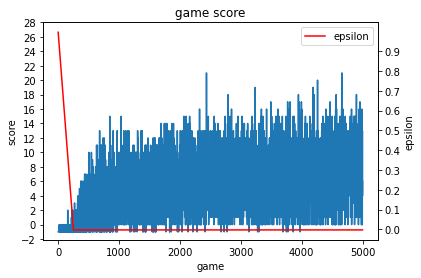

In [9]:
_, ax1 = plt.subplots()

plt.title("game score")
ax1.plot(scores)
ax1.set_xlabel("game")
ax1.set_ylabel("score")
ax1.set_yticks(np.arange(-2, 30, 2))

ax2 = ax1.twinx()
ax2.plot(epsilons, "r")
ax2.set_ylabel("epsilon")
ax2.set_yticks(np.arange(0, 1, 0.1))
ax2.legend(["epsilon"], loc="upper right")

plt.savefig(f"{brain.current_folder}/{brain_name}/game_score.jpg")
plt.show()

In [8]:
brain.save_model(name=brain_name, model_name=model_name)
agent.save_params(name=f"{brain.current_folder}/{brain_name}")

INFO:tensorflow:Assets written to: /Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/snake-deep-q-learning/brain/v2/fast-epsilon-decay/pre-trained/baseline/01_model_game-trained/assets


2022-04-20 06:15:22.648606: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
